## Problem Statement

X Education sells online courses and wants to improve its lead conversion rate. Currently the conversion is at 30% and the CEO has set a target of 80%.

## Steps in building a Logistic Regression Model

1.Importing Libraries,reading and understanding the data

2.Data Cleaning- Missing values Treatment, Identifying outliers

3.Data Visualisation

4.Data Preparation

5.Train Test Split

6.Building the Model

7.Evaluation of the Model

8.Predictions on the test set

### 1. Importing Libraries, Reading and Understanding the data

#### Importing the Libraries

In [1]:
#Importing the required libraries to analyze and visualize the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for model building
import statsmodels.api as sm
import sklearn

# setting the display option
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)

#### Reading the file

In [2]:
#reading the file using pandas
data = pd.read_csv("leads.csv")
#check the first few rows
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Understanding the data

In [3]:
#The data has 9240 records in 37 columns.
data.shape

(9240, 37)

In [4]:
#checking summary for null values and data type for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#checking count of null values 
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
#checking summary of numerical data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#let's check if there are duplicate rows in the data. There are no duplicate rows in the data.
data.duplicated().sum()

0

### 2.Data Cleaning

In [8]:
#Checking number of unique records in each column
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
#dropping Prospect ID and Lead Number since they contain unique values only and doesn't contribute in data analysis for this project
data = data.drop(["Prospect ID", "Lead Number"], axis=1)

In [10]:
# checking the data after deleting the columns
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Missing Value Treatment

In the problem statement it is given that the records in some of the columns are updated as Select/select and the same is as good as missing values.Hence we will update the same as NaN before proceeding with the missing value treatment.

In [11]:
# Replacing "select" as null value in the entire dataset
data.replace("select", np.nan, inplace=True)

In [12]:
## Replacing "Select" as null value in the entire dataset
data.replace("Select", np.nan, inplace=True)

In [13]:
#check null values again after the above step
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
#let's check the percentage value of null values in each column
round(((data.isnull().sum())/data.shape[0])*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
#let's drop the columns with null value more than 40%. There are seven such columns.
data = data.drop(["How did you hear about X Education","Lead Profile","Lead Quality", "Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"], axis=1)

In [16]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [17]:
#let's check the percentage value of null values in each column
round(((data.isnull().sum())/data.shape[0])*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [18]:
#let's work on columns where null values are greater than 5%. 
# Checking the records for column "Country"
data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [19]:
# "India" is the mode for Country column . So using India to update the missing values.
# Also the count of other countries is insignificant. Hence clubbing the same as "Other Countries"
data["Country"] = data["Country"].fillna("India")
data["Country"] = data["Country"].replace(['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown', 'South Africa', 'Nigeria', 'Germany', 'Kuwait', 'Canada', 'Sweden', 'China', 'Asia/Pacific Region', 'Uganda', 'Bangladesh', 'Italy', 'Belgium', 'Netherlands', 'Ghana', 'Philippines', 'Russia', 'Switzerland', 'Vietnam', 'Denmark', 'Tanzania', 'Liberia', 'Malaysia', 'Kenya', 'Sri Lanka', 'Indonesia'],"Other Countries")

In [20]:
# It can be seen that 97% of the records are India. Hence the column may not be relevant for the model. 
data["Country"].value_counts()

India              8953
Other Countries     287
Name: Country, dtype: int64

In [21]:
#dropping the column Country
data = data.drop(["Country"], axis=1)

In [22]:
#let's check the percentage value of null values in each column
round(((data.isnull().sum())/data.shape[0])*100)

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement                             0.0
Through Recommendations     

In [23]:
#let's check specialization column
data["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [24]:
# Mode maynot be an apt value for imputation as the there is no one stream which has records considerbaly higher than others.
# Hence instead of updating the missing values using mode, it is updated as "unkown".
# We will need to discuss with X Education before using any other value for update.

data["Specialization"]=data["Specialization"].fillna("unknown")

#let's check specialization column after updating missing values
data["Specialization"].value_counts()

unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
#we can see that there are many management specialization so let's just club them together for simplicity.
data["Specialization"]=data["Specialization"].replace(["Finance Management","Human Resource Management","Marketing Management","Operations Management","IT Projects Management","Supply Chain Management","Healthcare Management","Hospitality Management","Retail Management"],"Management")

In [26]:
data["Specialization"].value_counts()

Management                           4253
unknown                              3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
#let's check the percentage value of null values in each column
round(((data.isnull().mean()))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [28]:
# Checking the value counts of " What is your current occupation" column.
data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#let's replace null values in this column with unknown as any other change will require insights from X Education.
data["What is your current occupation"]=data["What is your current occupation"].fillna("unknown")
#let's check "What is your current occupation" column
data["What is your current occupation"].value_counts()

Unemployed              5600
unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#let's check the percentage value of null values in each column
round(((data.isnull().mean()))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [31]:
# Checking the column "What matters most to you in choosing a course"
data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
# If we update the missing columns with mode i.e. "Better Career Prospects" , then almost 99.9% will have this value.
# Hence dropping the column.
data = data.drop(["What matters most to you in choosing a course"], axis=1)

In [33]:
#let's check the percentage value of null values in each column
round(((data.isnull().mean()))*100,2)

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Tags                                        36.29


In [34]:
# Checking the column Tags
data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [35]:
#let's replace null values in this column with unknown
data["Tags"]=data["Tags"].fillna("unknown")
#let's check value counts for Tags column after updation
data["Tags"].value_counts()

unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [36]:
# Dropping the Tags column as it is difficult to standardise the comments in Tags.
data=data.drop("Tags",axis=1)

In [37]:
#let's check the percentage value of null values in each column
round(((data.isnull().mean()))*100,2)

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00


In [38]:
# Checking the column City
data["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
# Using mode= Mumbai to replace the null values in City column
data["City"]=data.City.fillna(data.City.mode()[0])

In [40]:
#let's check the percentage value of null values in each column
round(((data.isnull().mean()))*100,2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [41]:
# Since the missing values are negligible, the rows with missing values is deleted from the DataFrame.
data = data[~data[["Last Activity", "Page Views Per Visit", "TotalVisits","Lead Source"]].isnull().any(axis=1)]


In [42]:
# Checking the count of missing values
data.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
City                              

In [43]:
# Checking the data shape
data.shape

(9074, 25)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  What is your current occupation     

In [45]:
#let's check all other columns now. 
# Let us look at Lead Origin.
data["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [46]:
# Checking the value counts for Lead Source
data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [47]:
# Google, google can be merged as Google 
# values with count less than 50 is updated as others for the sake of simplicity.
data["Lead Source"]=data["Lead Source"].replace("google","Google")
data["Lead Source"]=data["Lead Source"].replace(["Facebook","bing","Click2call","Press_Release","Social Media","Live Chat","youtubechannel","testone","Pay per Click Ads","welearnblog_Home","WeLearn","blog","NC_EDM"],"Other")

In [48]:
# Checking the value counts for Lead Source
data["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Other                 54
Name: Lead Source, dtype: int64

In [49]:
# Checking the column "Do Not Email"
data["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [50]:
# Checking the column "Do Not Call"
data["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [51]:
#Since 99% of the records has only one value, we can drop the column "Do Not Call".
data=data.drop("Do Not Call",axis=1)

In [52]:
# This is the target variable. Checking the % counts for the same.
data["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [53]:
# Checking the column Last_Activity
data["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [54]:
#let's update all values whose count is less than 100 as "Others".
data["Last Activity"]=data["Last Activity"].replace(["Unreachable","Unsubscribed","Had a Phone Conversation",
                                                     "View in browser link Clicked","Approached upfront",
                                                     "Email Received","Email Marked Spam",
                                                     "Visited Booth in Tradeshow",
                                                     "Resubscribed to emails"],"Others")

In [55]:
# Checking the value counts for Last_Activity
data["Last Activity"].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [56]:
# Checking the column "Search"
data["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [57]:
#Dropping the column as 99% of the records are updated with one value.
data=data.drop("Search",axis=1)

In [58]:
# Checking the column "Magazine"
data["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [59]:
#Dropping the column as all records are updated with one value.
data=data.drop("Magazine",axis=1)

In [60]:
# Checking the column "Newspaper Article"
data["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [61]:
#Dropping the column as more than 99% of the records are updated with one value.
data=data.drop("Newspaper Article",axis=1)

In [62]:
# Checking the column "X Education Forums "
data["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [63]:
#Dropping the column as almost all the records are updated with one value.
data=data.drop("X Education Forums",axis=1)

In [64]:
# Checking the column "Newspaper "
data["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [65]:
#let's drop Newspaper column, almost all records have one value.
data=data.drop("Newspaper",axis=1)

In [66]:
# Checking the column "Digital Advertisement "
data["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [67]:
#let's drop Digital Advertisement column as almost all records have the same value
data=data.drop("Digital Advertisement",axis=1)

In [68]:
# Checking the column "Through Recommendations "
data["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [69]:
#let's drop Through Recommendations column as almost all records have the same value.
data=data.drop("Through Recommendations",axis=1)

In [70]:
# Checking the column "Receive More Updates About Our Courses"
data["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [71]:
#let's drop Receive More Updates About Our Courses column since all of data has one value
data=data.drop("Receive More Updates About Our Courses",axis=1)

In [72]:
# Checking the column Update me on Supply Chain Content
data["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [73]:
#let's drop Update me on Supply Chain Content column since all of data has one value.
data=data.drop("Update me on Supply Chain Content",axis=1)

In [74]:
# Checking the column "Get updates on DM Content"
data["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [75]:
#let's drop Get updates on DM Content column since the entire data has one value
data=data.drop("Get updates on DM Content",axis=1)

In [76]:
# Checking the column "I agree to pay the amount through cheque"
data["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [77]:
#let's drop I agree to pay the amount through cheque column since entire data has one value
data=data.drop("I agree to pay the amount through cheque",axis=1)

In [78]:
# Checking the column "A free copy of Mastering The Interview"
data["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [79]:
# Let us check column Last_Notable Activity.
data["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [80]:
# Since the column "Last Activity" and "Last Notable Activity" are redundant, we will drop Last Notable Activity.
data=data.drop("Last Notable Activity",axis=1)

In [81]:
#Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  City                                    9074 non-null   obje

In [82]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,unknown,Unemployed,Mumbai,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,unknown,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,unknown,Unemployed,Mumbai,No


#### Renaming columns

In [83]:
#let's rename columns
data.rename(columns={'Lead Origin':'Lead_Origin', 'Lead Source':'LeadSource',
       'Total Time Spent on Website':'Spent_Time', 'Page Views Per Visit':'Page_Views_Per_Visit', 'Last Activity':'Last_Activity',
       'What is your current occupation':'occupation',
       'A free copy of Mastering The Interview':'free_copy_for_interview', 'Do Not Email':'Do_Not_Email'},inplace=True)

In [84]:
data.columns

Index(['Lead_Origin', 'LeadSource', 'Do_Not_Email', 'Converted', 'TotalVisits',
       'Spent_Time', 'Page_Views_Per_Visit', 'Last_Activity', 'Specialization',
       'occupation', 'City', 'free_copy_for_interview'],
      dtype='object')

In [85]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead_Origin              9074 non-null   object 
 1   LeadSource               9074 non-null   object 
 2   Do_Not_Email             9074 non-null   object 
 3   Converted                9074 non-null   int64  
 4   TotalVisits              9074 non-null   float64
 5   Spent_Time               9074 non-null   int64  
 6   Page_Views_Per_Visit     9074 non-null   float64
 7   Last_Activity            9074 non-null   object 
 8   Specialization           9074 non-null   object 
 9   occupation               9074 non-null   object 
 10  City                     9074 non-null   object 
 11  free_copy_for_interview  9074 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 921.6+ KB


In [86]:
# The column "Converted" is the target variable.Creating a list of categorical and numeric variables.
cat_cols=['Lead_Origin','LeadSource','Last_Activity','Specialization','occupation','City','free_copy_for_interview','Do_Not_Email']
cont_cols= ['TotalVisits','Spent_Time','Page_Views_Per_Visit']
target_col=['Converted']
print("categorical variables count - ",len(cat_cols))
print("numeric variables count - ",len(cont_cols))

categorical variables count -  8
numeric variables count -  3


#### Checking for outliers in numeric variables

/Users/prasidh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


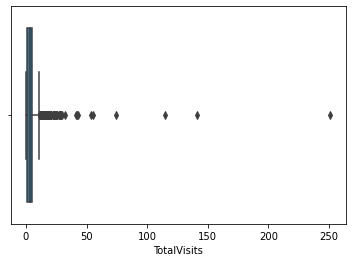

In [87]:
# Let us map the column TotalVisits into a boxplot
sns.boxplot(data['TotalVisits'])
plt.show()

In [88]:
# There are some outliers present here, let's check them


In [89]:
# Using the describe function on TotalVisits
data['TotalVisits'].describe(percentiles=[0.01,0.10,0.20,0.25,0.24,0.5,0.75,0.9,0.99,1])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
24%         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [90]:
#Removing the outliers by setting Q1 as 0.01 percentile and Q3 as 0.99 percentile as otherwise it might affect the model
Q3 = data['TotalVisits'].quantile(0.99)
data = data[(data['TotalVisits'] <= Q3)]
Q1 = data['TotalVisits'].quantile(0.01)
data = data[(data['TotalVisits'] >= Q1)]

In [91]:
# Checking the summary after updation.
data["TotalVisits"].describe()

count    8991.000000
mean        3.217106
std         2.989530
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

/Users/prasidh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


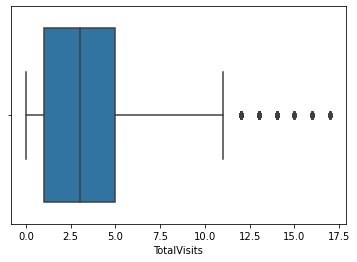

In [92]:
# plotting the boxplot after updation.With this,we see there are no major outliers in TotalVisits
sns.boxplot(data['TotalVisits'])
plt.show()

/Users/prasidh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


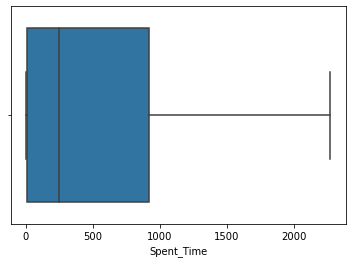

In [93]:
# Boxplot for Spent_time
sns.boxplot(data['Spent_Time'])
plt.show()

/Users/prasidh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


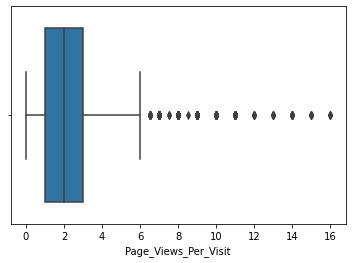

In [94]:
# Boxplot for Page_Views_Per_Visit
sns.boxplot(data['Page_Views_Per_Visit'])
plt.show()

In [95]:
# Checking the values at different percentiles. There are no major outliers. No outlier treatment done.
data['Page_Views_Per_Visit'].describe(percentiles=[0.01,0.10,0.20,0.25,0.24,0.5,0.75,0.9,0.99,1])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
24%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
100%       16.000000
max        16.000000
Name: Page_Views_Per_Visit, dtype: float64

### 3.Data Visualisation

#### Univariate,Bivariate and Multivariate Analysis

#### Visualisation of Categorical Variable

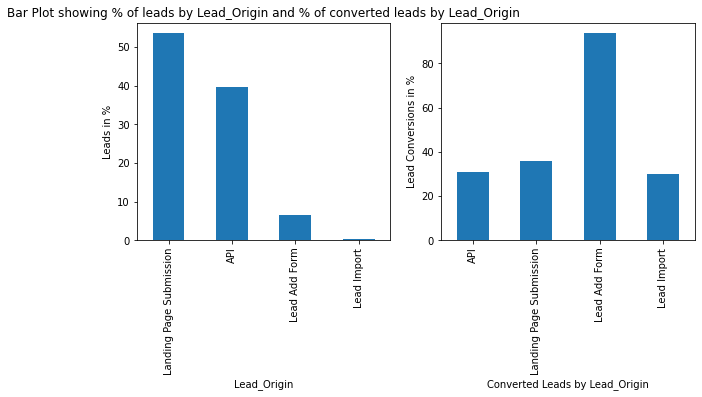

In [96]:
# Though most of the leads came from Landing Page Submission the conversion rates are higher in Lead Add Form
plt.figure(figsize=[10,4])
    
    
plt.subplot(1,2,1)
(data["Lead_Origin"].value_counts(normalize=True)*100).plot.bar()
plt.title("Bar Plot showing % of leads by Lead_Origin and % of converted leads by Lead_Origin",loc="center")
plt.xlabel("Lead_Origin")
plt.ylabel("Leads in %")
    
plt.subplot(1,2,2)
(data.groupby("Lead_Origin")["Converted"].mean()*100).plot.bar()
plt.xlabel("Converted Leads by Lead_Origin")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

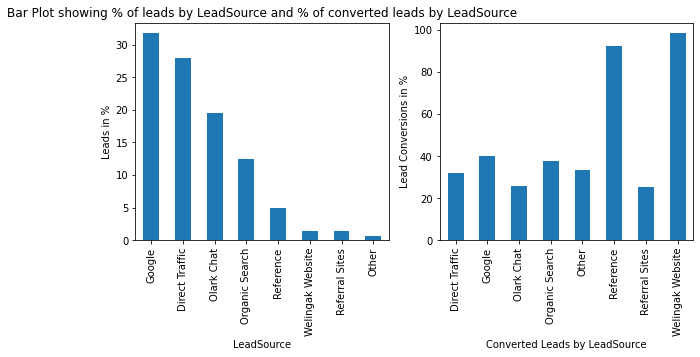

In [97]:
# Conversions are higher from Wellingak website and reference 
# though most of the leads are from Google followed by Direct Traffic
plt.figure(figsize=[10,4])
    

plt.subplot(1,2,1)
(data["LeadSource"].value_counts(normalize=True)*100).plot.bar()
plt.xlabel("LeadSource")
plt.ylabel("Leads in %")
plt.title("Bar Plot showing % of leads by LeadSource and % of converted leads by LeadSource",loc="center")

plt.subplot(1,2,2)
(data.groupby("LeadSource")["Converted"].mean()*100).plot.bar()
plt.xlabel("Converted Leads by LeadSource")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

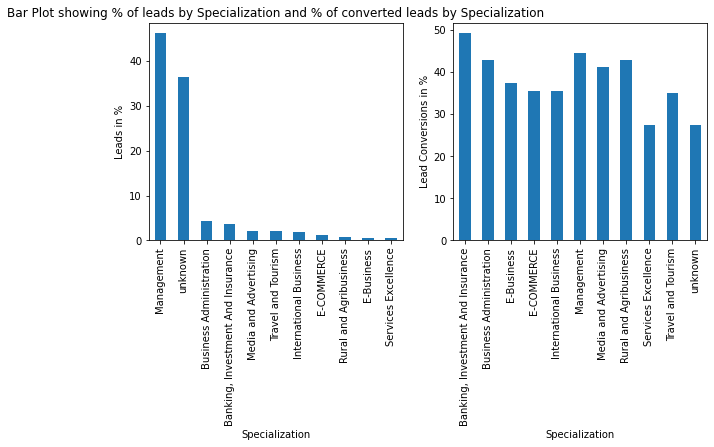

In [98]:
# The leads are significant from different Management streams but the conversions are more in Banking,Investment and Insurance
plt.figure(figsize=[10,4])
    

plt.subplot(1,2,1)
(data["Specialization"].value_counts(normalize=True)*100).plot.bar()
plt.xlabel("Specialization")
plt.ylabel("Leads in %")
plt.title("Bar Plot showing % of leads by Specialization and % of converted leads by Specialization",loc="center")

plt.subplot(1,2,2)
(data.groupby("Specialization")["Converted"].mean()*100).plot.bar()
plt.xlabel("Specialization")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

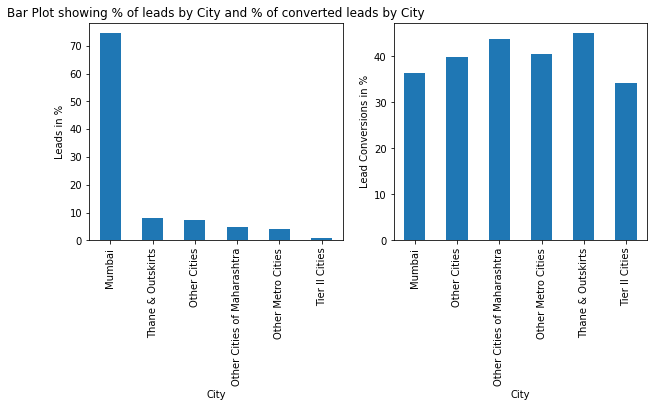

In [99]:
# Conversion rates are higher across cities
plt.figure(figsize=[10,4])
    

plt.subplot(1,2,1)
(data["City"].value_counts(normalize=True)*100).plot.bar()
plt.xlabel("City")
plt.ylabel("Leads in %")
plt.title("Bar Plot showing % of leads by City and % of converted leads by City",loc="center")

plt.subplot(1,2,2)
(data.groupby("City")["Converted"].mean()*100).plot.bar()
plt.xlabel("City")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

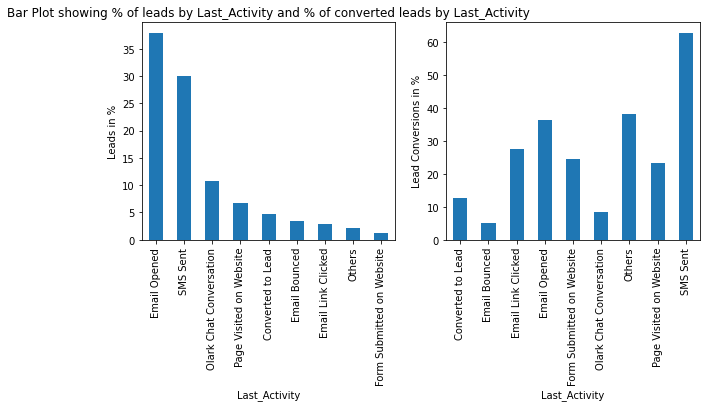

In [100]:
# Conversion rates are higher in cases where the last activity is sms sent
plt.figure(figsize=[10,4])
    

plt.subplot(1,2,1)
(data["Last_Activity"].value_counts(normalize=True)*100).plot.bar()
plt.xlabel("Last_Activity")
plt.ylabel("Leads in %")
plt.title("Bar Plot showing % of leads by Last_Activity and % of converted leads by Last_Activity",loc="center")

plt.subplot(1,2,2)
(data.groupby("Last_Activity")["Converted"].mean()*100).plot.bar()
plt.xlabel("Last_Activity")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

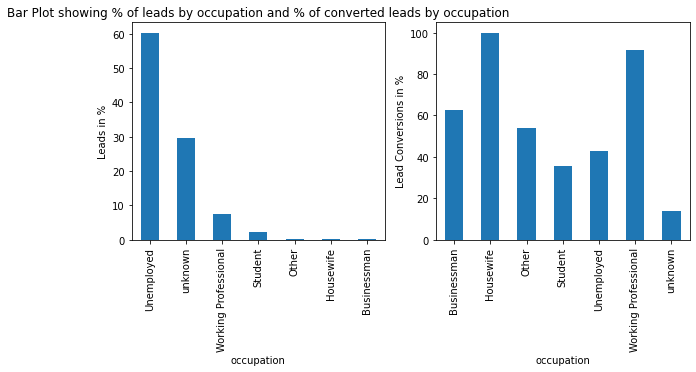

In [101]:
# For higher conversions, the focus should be on working professional and housewife
plt.figure(figsize=[10,4])
    

plt.subplot(1,2,1)
(data["occupation"].value_counts(normalize=True)*100).plot.bar()
plt.xlabel("occupation")
plt.ylabel("Leads in %")
plt.title("Bar Plot showing % of leads by occupation and % of converted leads by occupation",loc="center")

plt.subplot(1,2,2)
(data.groupby("occupation")["Converted"].mean()*100).plot.bar()
plt.xlabel("occupation")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

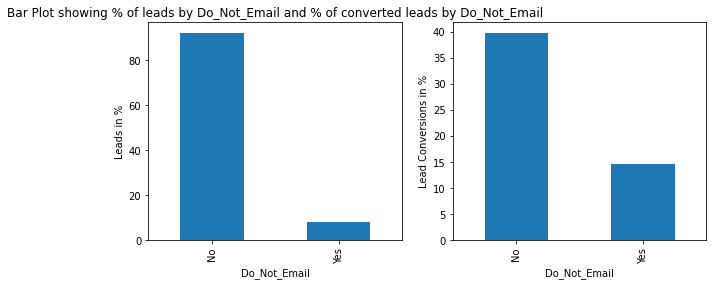

In [102]:
# Leads who opted for Do Not E-Mail have been converted significantly
plt.figure(figsize=[10,4])
    

plt.subplot(1,2,1)
(data["Do_Not_Email"].value_counts(normalize=True)*100).plot.bar()
plt.xlabel("Do_Not_Email")
plt.ylabel("Leads in %")
plt.title("Bar Plot showing % of leads by Do_Not_Email and % of converted leads by Do_Not_Email",loc="center")

plt.subplot(1,2,2)
(data.groupby("Do_Not_Email")["Converted"].mean()*100).plot.bar()
plt.xlabel("Do_Not_Email")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

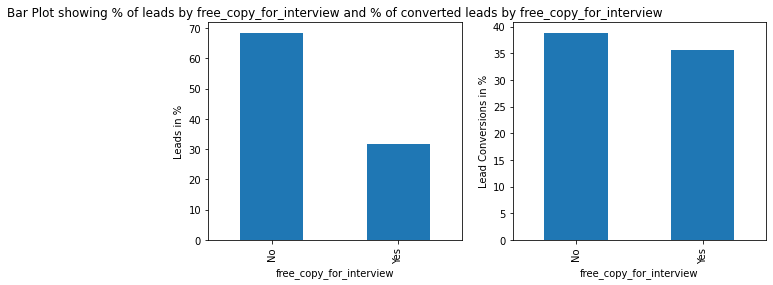

In [103]:
# Both leads who opted or not opted for copy for interview have converted to success leads.
plt.figure(figsize=[10,4])
    

plt.subplot(1,2,1)
(data["free_copy_for_interview"].value_counts(normalize=True)*100).plot.bar()
plt.xlabel("free_copy_for_interview")
plt.ylabel("Leads in %")
plt.title("Bar Plot showing % of leads by free_copy_for_interview and % of converted leads by free_copy_for_interview",loc="center")

plt.subplot(1,2,2)
(data.groupby("free_copy_for_interview")["Converted"].mean()*100).plot.bar()
plt.xlabel("free_copy_for_interview")
plt.ylabel("Lead Conversions in %")
plt.xticks(rotation=90)
plt.show()

#### Numeric variables visualisation

In [104]:
# Univariate Analysis of numeric variables has been done in the checking for outliers step. 
# Hence only bivariate analysis done here

<Figure size 720x576 with 0 Axes>

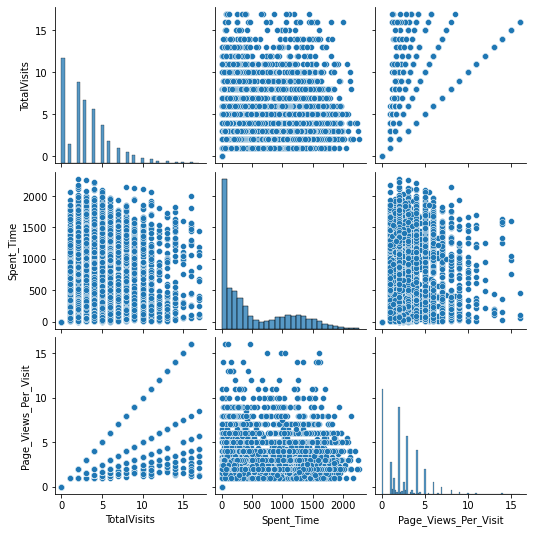

In [105]:
# There is a strong relation between TotalVisits and Page_Views_Per_Visit.
plt.figure(figsize=[10,8])

sns.pairplot(data=data,vars=["TotalVisits","Spent_Time","Page_Views_Per_Visit"])

plt.show()

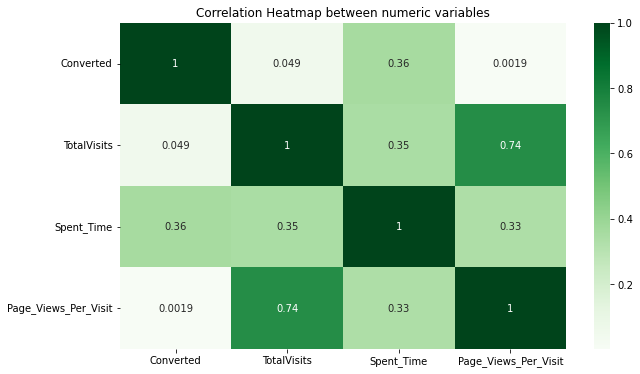

In [106]:
# Heatmap showing correlation between numeric variables
# Get only the numeric columns from your DataFrame
numeric_columns = data.select_dtypes(include=['number'])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
plt.title("Correlation Heatmap between numeric variables")
sns.heatmap(correlation_matrix, annot=True, cmap="Greens")
plt.show()

#### Numeric vs categorical variables

Boxplot TotalVisits Vs Lead_Origin


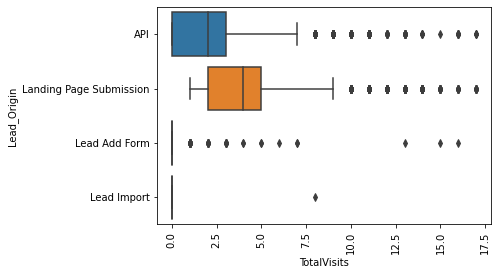

Boxplot TotalVisits Vs LeadSource


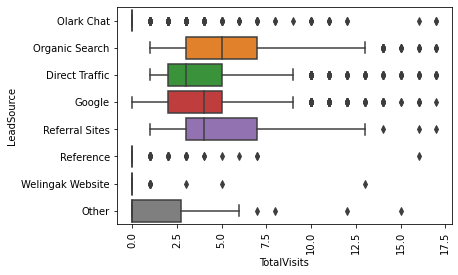

Boxplot TotalVisits Vs Last_Activity


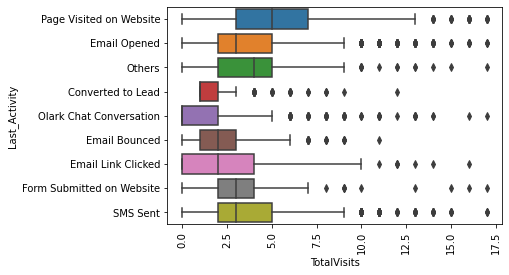

Boxplot TotalVisits Vs Specialization


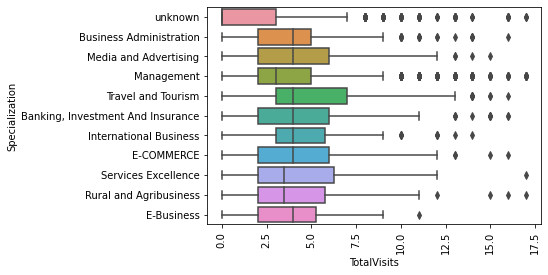

Boxplot TotalVisits Vs occupation


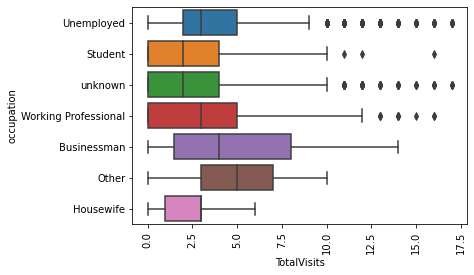

Boxplot TotalVisits Vs City


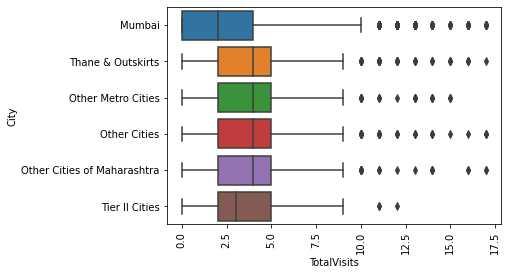

Boxplot TotalVisits Vs free_copy_for_interview


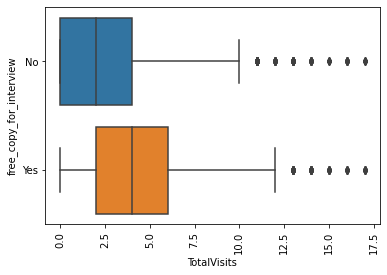

Boxplot TotalVisits Vs Do_Not_Email


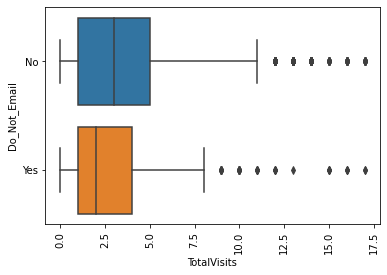

Boxplot Spent_Time Vs Lead_Origin


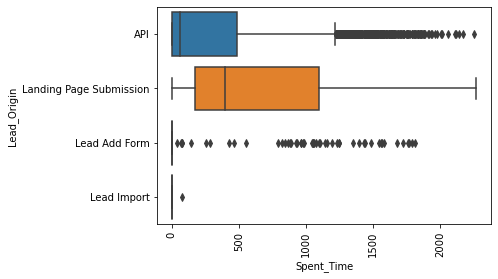

Boxplot Spent_Time Vs LeadSource


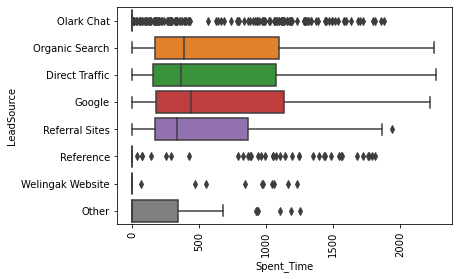

Boxplot Spent_Time Vs Last_Activity


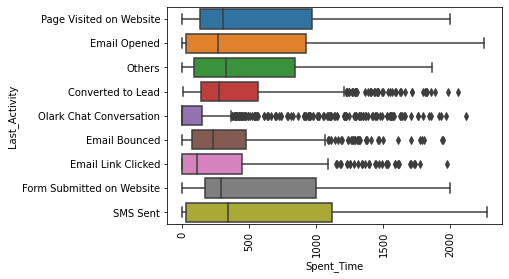

Boxplot Spent_Time Vs Specialization


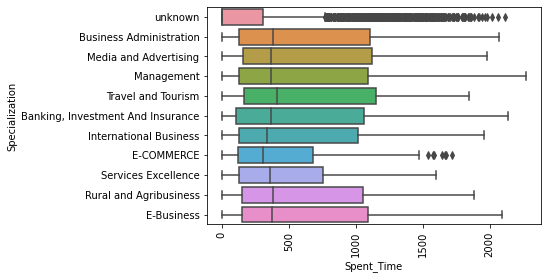

Boxplot Spent_Time Vs occupation


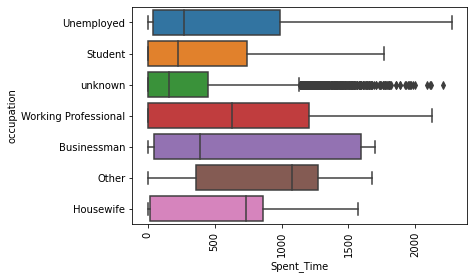

Boxplot Spent_Time Vs City


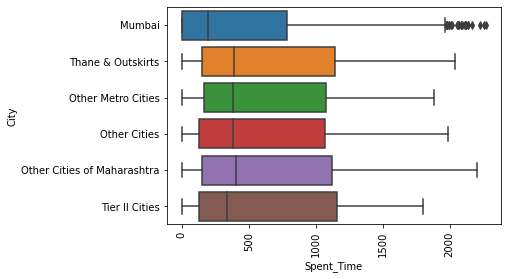

Boxplot Spent_Time Vs free_copy_for_interview


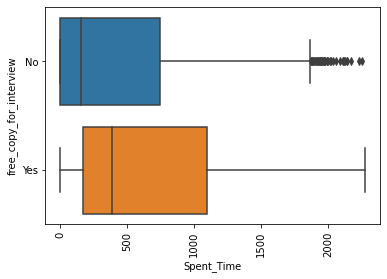

Boxplot Spent_Time Vs Do_Not_Email


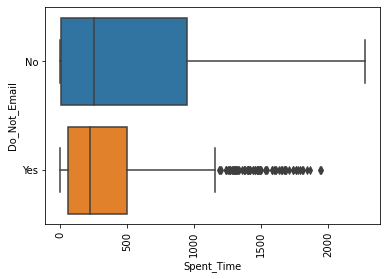

Boxplot Page_Views_Per_Visit Vs Lead_Origin


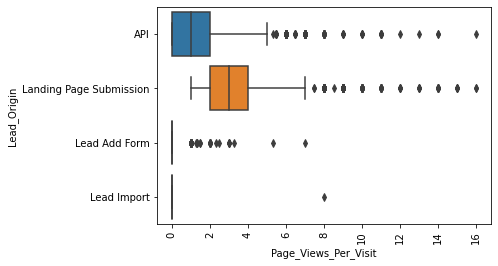

Boxplot Page_Views_Per_Visit Vs LeadSource


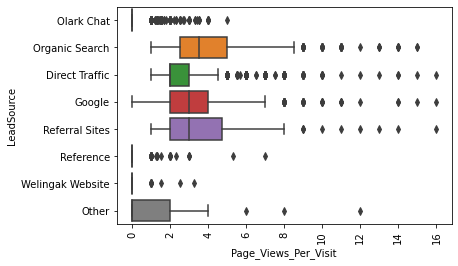

Boxplot Page_Views_Per_Visit Vs Last_Activity


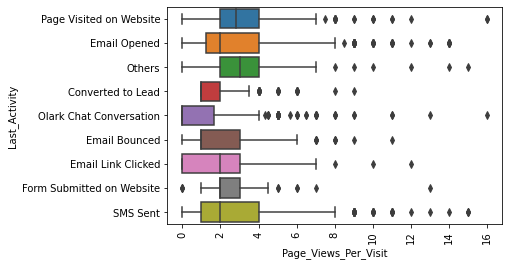

Boxplot Page_Views_Per_Visit Vs Specialization


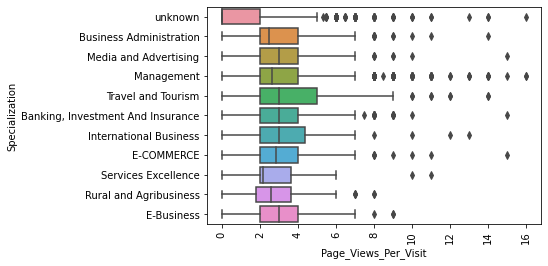

Boxplot Page_Views_Per_Visit Vs occupation


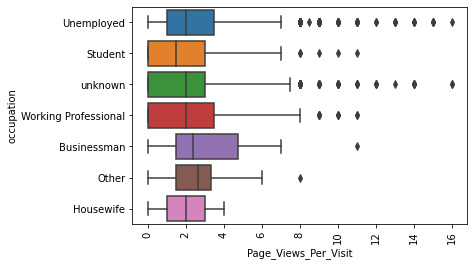

Boxplot Page_Views_Per_Visit Vs City


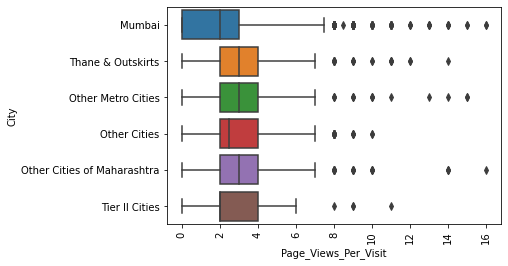

Boxplot Page_Views_Per_Visit Vs free_copy_for_interview


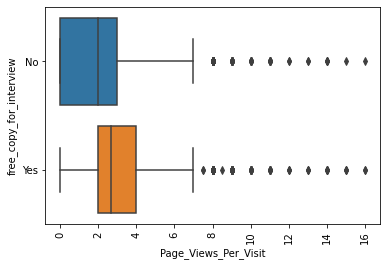

Boxplot Page_Views_Per_Visit Vs Do_Not_Email


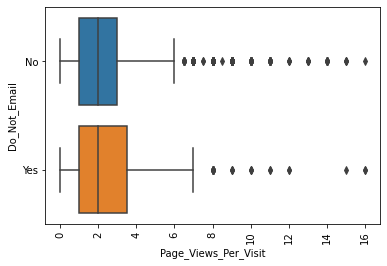

In [107]:

for i in cont_cols:
    for j in cat_cols :
        print("Boxplot", i ,"Vs",j)
        sns.boxplot(data=data, x=i, y=j)
        plt.xticks(rotation=90)
        plt.show()

In [108]:
data.shape

(8991, 12)

#### Checking for data imbalance in the target variable-Converted

<AxesSubplot:ylabel='Converted'>

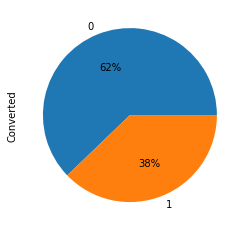

In [109]:
# there is a good mix of converted and not converted leads for the model building
data["Converted"].value_counts(normalize=True).plot.pie(autopct="%1.f%%")

### 4.Data Preparation

#### Converting the categorical binary variable

In [110]:
# Applying the replace function on free_copy_for_interview
data['free_copy_for_interview']=data['free_copy_for_interview'].replace({'Yes': 1, 'No': 0})

In [111]:
# Applying the replace function for Do_Not_Email
data['Do_Not_Email']=data['Do_Not_Email'].replace({'Yes': 1, 'No': 0})

In [112]:
data.head()

,Lead_Origin,LeadSource,Do_Not_Email,Converted,TotalVisits,Spent_Time,Page_Views_Per_Visit,Last_Activity,Specialization,occupation,City,free_copy_for_interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,unknown,Unemployed,Mumbai,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,unknown,Unemployed,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,unknown,Unemployed,Mumbai,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead_Origin              8991 non-null   object 
 1   LeadSource               8991 non-null   object 
 2   Do_Not_Email             8991 non-null   int64  
 3   Converted                8991 non-null   int64  
 4   TotalVisits              8991 non-null   float64
 5   Spent_Time               8991 non-null   int64  
 6   Page_Views_Per_Visit     8991 non-null   float64
 7   Last_Activity            8991 non-null   object 
 8   Specialization           8991 non-null   object 
 9   occupation               8991 non-null   object 
 10  City                     8991 non-null   object 
 11  free_copy_for_interview  8991 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


#### Creation of dummy variable for categorical variables with more than 2 levels

In [114]:
# Creating dummy variables for the below categorical variables and dropping the first one

dummy1=pd.get_dummies(data[["Lead_Origin","LeadSource","Last_Activity","City"]],drop_first=True)

In [115]:
# Adding the results to master dataframe
data = pd.concat([data, dummy1], axis=1)

In [116]:
# Creating dummy variables for occupation categorical variables.

dummy2=pd.get_dummies(data["occupation"],prefix="occupation")
dummy2.head()

,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_unknown
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [117]:
# dropping occupation_unknown so that variables that business understands is retained
dummy3=dummy2.drop(["occupation_unknown"],1)

/var/folders/_1/zmhrjjbx77z9rkm_jr947sfc0000gn/T/ipykernel_1234/1474663063.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy3=dummy2.drop(["occupation_unknown"],1)


In [118]:
# concatenating the same with main Dataframe 
data = pd.concat([data, dummy3], axis=1)


In [119]:
data.head()

,Lead_Origin,LeadSource,Do_Not_Email,Converted,TotalVisits,Spent_Time,Page_Views_Per_Visit,Last_Activity,Specialization,occupation,City,free_copy_for_interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,unknown,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,unknown,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,unknown,Unemployed,Mumbai,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [120]:
# Creating the dummy variable for Specialization 
dummy4=pd.get_dummies(data["Specialization"],prefix="Specialization")
dummy4.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_unknown
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [121]:
# Dropping the dummy variable Specialization_unkwon so that variables that make business sense is retained.
dummy5=dummy4.drop(["Specialization_unknown"],1)

/var/folders/_1/zmhrjjbx77z9rkm_jr947sfc0000gn/T/ipykernel_1234/2296867411.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy5=dummy4.drop(["Specialization_unknown"],1)


In [122]:
# concatenating with Main DataFrame
data = pd.concat([data, dummy5], axis=1)


In [123]:
# checking the data
data.head()

,Lead_Origin,LeadSource,Do_Not_Email,Converted,TotalVisits,Spent_Time,Page_Views_Per_Visit,Last_Activity,Specialization,occupation,City,free_copy_for_interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,unknown,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,unknown,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,unknown,Unemployed,Mumbai,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [124]:
# Dropping the columns for which dummy variables are created
data.drop(["Lead_Origin","LeadSource","Last_Activity","City","Specialization",
                           "occupation"],
         axis=1,inplace=True)

In [125]:
data.shape

(8991, 45)

In [126]:
data.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do_Not_Email                                      8991 non-null   int64  
 1   Converted                                         8991 non-null   int64  
 2   TotalVisits                                       8991 non-null   float64
 3   Spent_Time                                        8991 non-null   int64  
 4   Page_Views_Per_Visit                              8991 non-null   float64
 5   free_copy_for_interview                           8991 non-null   int64  
 6   Lead_Origin_Landing Page Submission               8991 non-null   uint8  
 7   Lead_Origin_Lead Add Form                         8991 non-null   uint8  
 8   Lead_Origin_Lead Import                           8991 non-null   uint8  
 9   LeadSource_Google  

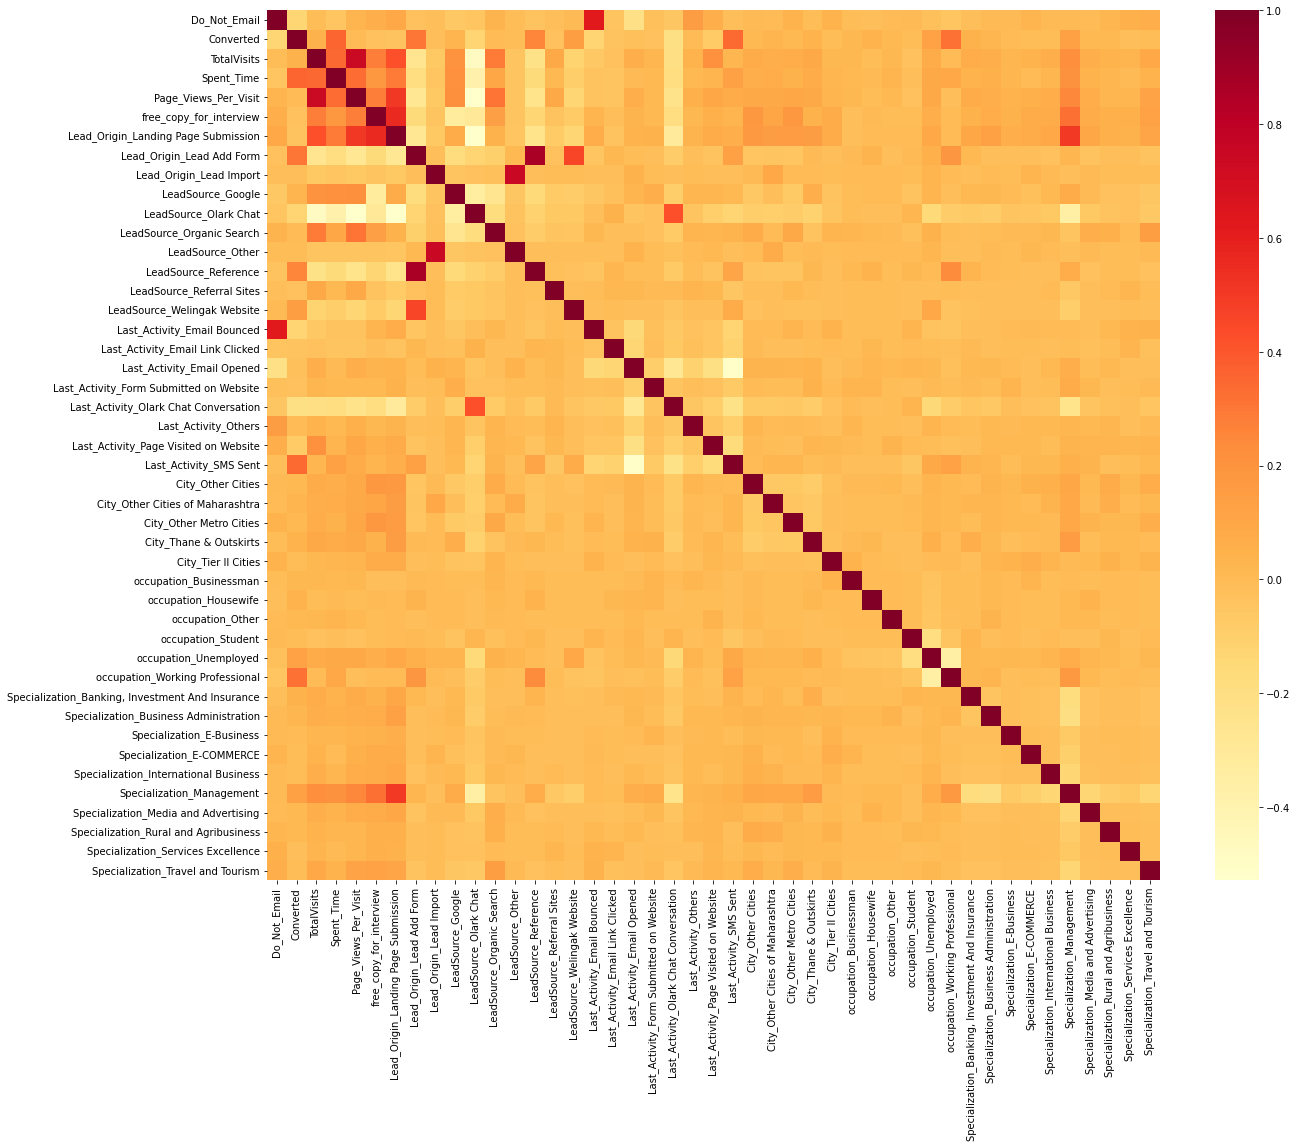

In [127]:
# There are some strong correlations between Lead_Origin_Lead Add Form and LeadSource_Reference,Page_Views_Per_Visit and TotalVisits
# However no variables dropped at this stage
plt.figure(figsize=[20,16])
sns.heatmap(data.corr(),cmap="YlOrRd")
plt.show()

### 5.Train Test Split

In [128]:
from sklearn.model_selection import train_test_split

#### Dividing the dataframe into X and y

In [129]:
# Creating X after dropping target variable
X=data.drop("Converted",axis=1)
X.shape

(8991, 44)

In [130]:
# Putting target variable -Converted in y
y=data["Converted"]
y.shape

(8991,)

#### Splitting the data into train and test sets

In [131]:
# Train and test set size is set at 0.7 and 0.3 respectively
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [132]:
# checking the number of records in training set
X_train.shape

(6293, 44)

In [133]:
# Checking the number of records in the testing set
X_test.shape

(2698, 44)

#### Scaling the numeric data using MinMaxScaler

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
# initiating the scaler
scaler = MinMaxScaler()

In [136]:
# Scaling the training set using fit_transform and test set using only transform
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [137]:
# creating a DataFrame for the X_train_scaled
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [138]:
# Checking the train set
X_train_scaled.head()

,Do_Not_Email,TotalVisits,Spent_Time,Page_Views_Per_Visit,free_copy_for_interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.0,0.235294,0.393486,0.25000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.352941,0.175176,0.18750,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.647059,0.055458,0.07625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
# Creating a DataFrame for scaled test set
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [140]:
# checking the test set
X_test_scaled.head()

,Do_Not_Email,TotalVisits,Spent_Time,Page_Views_Per_Visit,free_copy_for_interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.0,0.176471,0.133803,0.09375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.176471,0.187060,0.09375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.235294,0.378961,0.25000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.117647,0.032570,0.12500,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 6.Building the model

#### Feature Selection

In [141]:
# importing the methods for building the model and feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [142]:
# Feature selection, we will start by selecting 20 features
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=20)
selector.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [143]:
selector.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False, False])

In [144]:
# identifying the columns to be kept as per the RFE
cols_to_keep=X_train_scaled.columns[selector.support_]
cols_to_keep

Index(['Do_Not_Email', 'TotalVisits', 'Spent_Time', 'Page_Views_Per_Visit',
       'Lead_Origin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'occupation_Businessman',
       'occupation_Housewife', 'occupation_Other', 'occupation_Student',
       'occupation_Unemployed', 'occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-Business', 'Specialization_Rural and Agribusiness'],
      dtype='object')

In [145]:
# Modifying the train and test set to keep only the columns selected by RFE
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

In [146]:
# checking the shape of train set
X_train.shape

(6293, 20)

In [147]:
# checking the shape of test set
X_test.shape

(2698, 20)

In [148]:
# Checking y_train
y_train

1467    1
108     0
7858    1
5220    1
3871    0
       ..
368     0
82      1
8277    1
7138    0
5803    1
Name: Converted, Length: 6293, dtype: int64

#### Building the first model

In [149]:
import statsmodels.api as sm


In [150]:
# adding a constant to X_train and X_test
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [151]:
# building the model
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [152]:
# summary of the first model
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.4
Date:                Mon, 16 Oct 2023   Deviance:                       5104.9
Time:                        11:09:17   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4013
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.6235      0.128    -28.219      0.000      -3.875      -3.372
Do_Not_Email                                        -1.6032      0.174     -9.211      0.000      -1.944      -1.262
TotalVisits                                          1.6261      0.286      5.683      0.000       1.065       2.187
Spent_Time                                           4.6604      0.170     27.448      0.000       4.328       4.993
Page_Views_Per_Visit                                -1.3271      0.416     -3.193      0.001      -2.142      -0.513
Lead_Origin_Lead Add Form                            2.5782      0.887      2.907      0.004       0.840       4.316
LeadSource_Olark Chat                                1.6013      0.126     12.714      0.000       1.354       1.848
LeadSource_Reference                                 1.6436      0.921      1.786      0.074      -0.161       3.448
LeadSource_Welingak Website                          3.8679      1.344      2.879      0.004       1.234       6.502
Last_Activity_Olark Chat Conversation               -1.2922      0.167     -7.724      0.000      -1.620      -0.964
Last_Activity_Others                                 0.9178      0.223      4.115      0.000       0.481       1.355
Last_Activity_SMS Sent                               1.3830      0.077     18.019      0.000       1.233       1.533
occupation_Businessman                               1.4346      1.019      1.407      0.159      -0.563       3.432
occupation_Housewife                                24.0958   1.78e+04      0.001      0.999   -3.49e+04    3.49e+04
occupation_Other                                     1.3925      0.779      1.786      0.074      -0.135       2.920
occupation_Student                                   1.2825      0.236      5.424      0.000       0.819       1.746
occupation_Unemployed                                1.2223      0.089     13.795      0.000       1.049       1.396
occupation_Working Professional                      3.7695      0.203     18.582      0.000       3.372       4.167
Specialization_Banking, Investment And Insurance     0.4972      0.177      2.804      0.005       0.150       0.845
Specialization_E-Business                            0.4181      0.410      1.020      0.308      -0.385       1.221
Specialization_Rural and Agribusiness                0.5035      0.372      1.354      0.176      -0.225       1.232
====================================================================================================================
"""

#### The p- value of some the variables is more than 0.05. In this occupation_Housewife has a p-value of 0.999.Hence let us build another model by dropping occupation_housewife

#### Building the second model

In [153]:
#dropping occupation_Housewife from train and test sets
X_train_sm=X_train_sm.drop("occupation_Housewife",axis=1)
X_test_sm=X_test_sm.drop("occupation_Housewife",axis=1)

In [154]:
# second model
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())


In [155]:
#summary results of the second model
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.0
Date:                Mon, 16 Oct 2023   Deviance:                       5116.0
Time:                        11:09:19   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.6008      0.128    -28.179      0.000      -3.851      -3.350
Do_Not_Email                                        -1.6058      0.174     -9.224      0.000      -1.947      -1.265
TotalVisits                                          1.6201      0.286      5.668      0.000       1.060       2.180
Spent_Time                                           4.6545      0.170     27.459      0.000       4.322       4.987
Page_Views_Per_Visit                                -1.3260      0.415     -3.194      0.001      -2.140      -0.512
Lead_Origin_Lead Add Form                            2.5755      0.886      2.906      0.004       0.838       4.313
LeadSource_Olark Chat                                1.5937      0.126     12.672      0.000       1.347       1.840
LeadSource_Reference                                 1.7100      0.920      1.858      0.063      -0.094       3.514
LeadSource_Welingak Website                          3.8684      1.343      2.879      0.004       1.235       6.502
Last_Activity_Olark Chat Conversation               -1.2964      0.167     -7.754      0.000      -1.624      -0.969
Last_Activity_Others                                 0.9129      0.223      4.094      0.000       0.476       1.350
Last_Activity_SMS Sent                               1.3770      0.077     17.962      0.000       1.227       1.527
occupation_Businessman                               1.4104      1.021      1.382      0.167      -0.591       3.411
occupation_Other                                     1.3755      0.779      1.765      0.078      -0.152       2.903
occupation_Student                                   1.2633      0.236      5.343      0.000       0.800       1.727
occupation_Unemployed                                1.2048      0.088     13.684      0.000       1.032       1.377
occupation_Working Professional                      3.7510      0.203     18.516      0.000       3.354       4.148
Specialization_Banking, Investment And Insurance     0.4938      0.177      2.786      0.005       0.146       0.841
Specialization_E-Business                            0.4135      0.410      1.009      0.313      -0.390       1.217
Specialization_Rural and Agribusiness                0.5007      0.372      1.348      0.178      -0.228       1.229
====================================================================================================================
"""

#### The p-value of 0.313 for Specialization_E-Business is more than the threshold value of 0.05.Hence we will build the third model by dropping this variable

#### Building the third model

In [156]:
# dropping "Specialization_E-Business" from training and testing set
X_train_sm=X_train_sm.drop("Specialization_E-Business",axis=1)
X_test_sm=X_test_sm.drop("Specialization_E-Business",axis=1)

In [157]:
# model 3
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [158]:
# summarising the results of model 3
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.5
Date:                Mon, 16 Oct 2023   Deviance:                       5117.0
Time:                        11:09:20   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.5974      0.128    -28.178      0.000      -3.848      -3.347
Do_Not_Email                                        -1.6029      0.174     -9.212      0.000      -1.944      -1.262
TotalVisits                                          1.6155      0.286      5.652      0.000       1.055       2.176
Spent_Time                                           4.6544      0.169     27.460      0.000       4.322       4.987
Page_Views_Per_Visit                                -1.3160      0.415     -3.172      0.002      -2.129      -0.503
Lead_Origin_Lead Add Form                            2.5729      0.886      2.903      0.004       0.836       4.310
LeadSource_Olark Chat                                1.5902      0.126     12.653      0.000       1.344       1.837
LeadSource_Reference                                 1.7139      0.920      1.862      0.063      -0.090       3.518
LeadSource_Welingak Website                          3.8673      1.343      2.879      0.004       1.234       6.500
Last_Activity_Olark Chat Conversation               -1.2942      0.167     -7.747      0.000      -1.622      -0.967
Last_Activity_Others                                 0.9126      0.223      4.098      0.000       0.476       1.349
Last_Activity_SMS Sent                               1.3767      0.077     17.959      0.000       1.226       1.527
occupation_Businessman                               1.4063      1.021      1.377      0.168      -0.595       3.408
occupation_Other                                     1.3713      0.779      1.759      0.079      -0.156       2.899
occupation_Student                                   1.2653      0.236      5.353      0.000       0.802       1.729
occupation_Unemployed                                1.2044      0.088     13.686      0.000       1.032       1.377
occupation_Working Professional                      3.7472      0.203     18.504      0.000       3.350       4.144
Specialization_Banking, Investment And Insurance     0.4900      0.177      2.765      0.006       0.143       0.837
Specialization_Rural and Agribusiness                0.4970      0.371      1.338      0.181      -0.231       1.225
====================================================================================================================
"""

#### We will build the fourth model by dropping "Specialization_Rural and Agribusiness" as its p value is more than 0.05

#### Fourth Model

In [159]:
# dropping the variable "Specialization_Rural and Agribusiness"
X_train_sm=X_train_sm.drop("Specialization_Rural and Agribusiness",axis=1)
X_test_sm=X_test_sm.drop("Specialization_Rural and Agribusiness",axis=1)

In [160]:
# checking the shape of X_train_sm before proceeding
X_train_sm.shape

(6293, 18)

In [161]:
# building the 4th model
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())


In [162]:
# summarising the results of the 4th model
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.4
Date:                Mon, 16 Oct 2023   Deviance:                       5118.7
Time:                        11:09:21   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4000
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.5941      0.128    -28.161      0.000      -3.844      -3.344
Do_Not_Email                                        -1.6014      0.174     -9.198      0.000      -1.943      -1.260
TotalVisits                                          1.6257      0.286      5.692      0.000       1.066       2.185
Spent_Time                                           4.6548      0.169     27.467      0.000       4.323       4.987
Page_Views_Per_Visit                                -1.3186      0.415     -3.180      0.001      -2.131      -0.506
Lead_Origin_Lead Add Form                            2.5693      0.886      2.899      0.004       0.832       4.306
LeadSource_Olark Chat                                1.5897      0.126     12.650      0.000       1.343       1.836
LeadSource_Reference                                 1.7146      0.920      1.863      0.062      -0.089       3.518
LeadSource_Welingak Website                          3.8677      1.343      2.879      0.004       1.235       6.501
Last_Activity_Olark Chat Conversation               -1.2993      0.167     -7.779      0.000      -1.627      -0.972
Last_Activity_Others                                 0.9156      0.223      4.111      0.000       0.479       1.352
Last_Activity_SMS Sent                               1.3736      0.077     17.936      0.000       1.223       1.524
occupation_Businessman                               1.3995      1.021      1.371      0.170      -0.601       3.400
occupation_Other                                     1.3660      0.779      1.753      0.080      -0.161       2.893
occupation_Student                                   1.2790      0.236      5.417      0.000       0.816       1.742
occupation_Unemployed                                1.2052      0.088     13.696      0.000       1.033       1.378
occupation_Working Professional                      3.7452      0.202     18.501      0.000       3.348       4.142
Specialization_Banking, Investment And Insurance     0.4846      0.177      2.736      0.006       0.137       0.832
====================================================================================================================
"""

#### Since p values are still above 0.05 for some variables, we will build the fifth model by dropping "occupation_Businessman"

#### Building the Fifth Model

In [163]:
# dropping the variable "occupation_Businessman"
X_train_sm=X_train_sm.drop("occupation_Businessman",axis=1)
X_test_sm=X_test_sm.drop("occupation_Businessman",axis=1)

In [164]:
# Building the 5th model
model5=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [165]:
# summary results of the 5th model
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.4
Date:                Mon, 16 Oct 2023   Deviance:                       5120.8
Time:                        11:09:21   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.5886      0.127    -28.162      0.000      -3.838      -3.339
Do_Not_Email                                        -1.6045      0.174     -9.214      0.000      -1.946      -1.263
TotalVisits                                          1.6297      0.286      5.699      0.000       1.069       2.190
Spent_Time                                           4.6608      0.169     27.512      0.000       4.329       4.993
Page_Views_Per_Visit                                -1.3083      0.414     -3.157      0.002      -2.121      -0.496
Lead_Origin_Lead Add Form                            2.5729      0.886      2.903      0.004       0.836       4.310
LeadSource_Olark Chat                                1.5915      0.126     12.670      0.000       1.345       1.838
LeadSource_Reference                                 1.7299      0.920      1.880      0.060      -0.074       3.534
LeadSource_Welingak Website                          3.8697      1.343      2.880      0.004       1.237       6.503
Last_Activity_Olark Chat Conversation               -1.3020      0.167     -7.796      0.000      -1.629      -0.975
Last_Activity_Others                                 0.9242      0.222      4.165      0.000       0.489       1.359
Last_Activity_SMS Sent                               1.3708      0.077     17.910      0.000       1.221       1.521
occupation_Other                                     1.3557      0.779      1.740      0.082      -0.172       2.883
occupation_Student                                   1.2699      0.236      5.380      0.000       0.807       1.733
occupation_Unemployed                                1.1960      0.088     13.650      0.000       1.024       1.368
occupation_Working Professional                      3.7363      0.202     18.468      0.000       3.340       4.133
Specialization_Banking, Investment And Insurance     0.4824      0.177      2.724      0.006       0.135       0.830
====================================================================================================================
"""

#### We will create the sixth model by dropping the variable occupation_Other as p value is 0.082

#### Sixth Model

In [166]:
# dropping the variable occupation_Other in train and test set
X_train_sm=X_train_sm.drop("occupation_Other",axis=1)
X_test_sm=X_test_sm.drop("occupation_Other",axis=1)

In [167]:
model6=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [168]:
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.7
Date:                Mon, 16 Oct 2023   Deviance:                       5123.4
Time:                        11:09:22   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3996
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.5780      0.127    -28.153      0.000      -3.827      -3.329
Do_Not_Email                                        -1.5979      0.174     -9.185      0.000      -1.939      -1.257
TotalVisits                                          1.6319      0.286      5.705      0.000       1.071       2.192
Spent_Time                                           4.6641      0.169     27.531      0.000       4.332       4.996
Page_Views_Per_Visit                                -1.3078      0.414     -3.156      0.002      -2.120      -0.496
Lead_Origin_Lead Add Form                            2.5736      0.886      2.904      0.004       0.837       4.311
LeadSource_Olark Chat                                1.5902      0.126     12.665      0.000       1.344       1.836
LeadSource_Reference                                 1.7291      0.920      1.879      0.060      -0.074       3.533
LeadSource_Welingak Website                          3.8685      1.343      2.880      0.004       1.236       6.501
Last_Activity_Olark Chat Conversation               -1.3000      0.167     -7.786      0.000      -1.627      -0.973
Last_Activity_Others                                 0.9194      0.222      4.144      0.000       0.485       1.354
Last_Activity_SMS Sent                               1.3670      0.076     17.876      0.000       1.217       1.517
occupation_Student                                   1.2588      0.236      5.337      0.000       0.797       1.721
occupation_Unemployed                                1.1855      0.087     13.586      0.000       1.014       1.357
occupation_Working Professional                      3.7252      0.202     18.432      0.000       3.329       4.121
Specialization_Banking, Investment And Insurance     0.4803      0.177      2.713      0.007       0.133       0.827
====================================================================================================================
"""

#### We will build the seventh model by dropping the variable LeadSource_Reference as its p-value is more than 0.05

#### Building the seventh model

In [169]:
# dropping the variable "LeadSource_Reference"
X_train_sm=X_train_sm.drop("LeadSource_Reference",axis=1)
X_test_sm=X_test_sm.drop("LeadSource_Reference",axis=1)

In [170]:
X_train_sm.shape

(6293, 15)

In [171]:
X_test_sm.shape

(2698, 15)

In [172]:
# building the seventh model
model7=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [173]:
# summarising the model 7 results
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.1
Date:                Mon, 16 Oct 2023   Deviance:                       5126.3
Time:                        11:09:23   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.5762      0.127    -28.138      0.000      -3.825      -3.327
Do_Not_Email                                        -1.5949      0.174     -9.183      0.000      -1.935      -1.254
TotalVisits                                          1.6304      0.286      5.698      0.000       1.070       2.191
Spent_Time                                           4.6622      0.169     27.519      0.000       4.330       4.994
Page_Views_Per_Visit                                -1.3103      0.414     -3.161      0.002      -2.123      -0.498
Lead_Origin_Lead Add Form                            4.2075      0.265     15.904      0.000       3.689       4.726
LeadSource_Olark Chat                                1.5876      0.126     12.637      0.000       1.341       1.834
LeadSource_Welingak Website                          2.2328      1.042      2.143      0.032       0.191       4.275
Last_Activity_Olark Chat Conversation               -1.2986      0.167     -7.779      0.000      -1.626      -0.971
Last_Activity_Others                                 0.9208      0.222      4.154      0.000       0.486       1.355
Last_Activity_SMS Sent                               1.3676      0.076     17.889      0.000       1.218       1.517
occupation_Student                                   1.2624      0.235      5.362      0.000       0.801       1.724
occupation_Unemployed                                1.1845      0.087     13.578      0.000       1.013       1.355
occupation_Working Professional                      3.7261      0.202     18.444      0.000       3.330       4.122
Specialization_Banking, Investment And Insurance     0.4817      0.177      2.723      0.006       0.135       0.828
====================================================================================================================
"""

#### Since all the p values of all variables is less than 0.05, we will now check the VIF's

In [174]:
# checking the VIF's

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Features"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Features,VIF
0,const,9.621769
1,Do_Not_Email,1.037757
2,TotalVisits,2.327437
3,Spent_Time,1.311371
4,Page_Views_Per_Visit,2.574292
5,Lead_Origin_Lead Add Form,1.641182
6,LeadSource_Olark Chat,1.938879
7,LeadSource_Welingak Website,1.288301
8,Last_Activity_Olark Chat Conversation,1.276226
9,Last_Activity_Others,1.037105


#### Since all p values of all variables is less than 0.05 and VIF is less than 5 , we will go ahead with the seventh model

In [176]:
# Probability Prediction on the training set
y_train_pred=result7.predict(X_train_sm)

In [177]:
y_train_pred.shape

(6293,)

In [178]:
y_train.shape

(6293,)

In [179]:
y_train.head()

1467    1
108     0
7858    1
5220    1
3871    0
Name: Converted, dtype: int64

In [180]:
# Probability Predictions on the test set
y_test_pred=result7.predict(X_test_sm)

In [181]:
y_test_pred.head()

0    0.441430
1    0.960205
2    0.073157
3    0.689714
4    0.021739
dtype: float64

In [182]:
# Creating a dataframe with the Actual Conversion, Predicted Probability and Predicted Conversion on training set 
train=pd.DataFrame()
train["Predicted_Prob"]=y_train_pred
train["Actual"]=y_train.values
train["Predicted_Class"]=np.where(train["Predicted_Prob"]>0.5,1,0)
train.head()

,Predicted_Prob,Actual,Predicted_Class
0,0.967957,1,1
1,0.023469,0,0
2,0.547245,1,1
3,0.349581,1,0
4,0.120414,0,0


In [183]:
# checking the shape of the train DataFrame
train.shape

(6293, 3)

### 7.Evaluation of the Model

In [184]:
from sklearn import metrics

#### Confusion Matrix

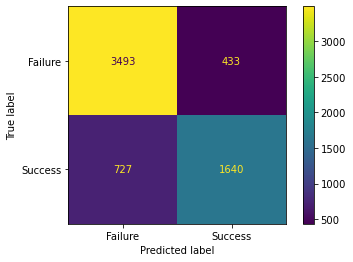

In [185]:
confusion_matrix=metrics.confusion_matrix(train["Actual"],train["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.show()

#### Accuracy

In [186]:
# Let us check the accuracy of the training set. The model is doing well with 81.5% accuracy
metrics.accuracy_score(train.Actual,train["Predicted_Class"])

0.815668202764977

In [187]:
# Creating variables for True Postive(TP),True Negative(TN),False Positive(FP) and False Negative(FN)
TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

In [188]:
# We have chosen sensitivity and specificity for model evaluation.
# Let us check the sensitivity for this model. Sensitivity is low.
sensitivity=TP/(TP+FN)
sensitivity

0.6928601605407689

In [189]:
# If sensitivity is low then specificity should be high
specificity=TN/(TN+FP)
specificity

0.8897096281202241

In [190]:
# Let us calculate the positive predictive value. 79% of the positive predictions are true.
TP/(TP+FP)

0.7911239749155813

In [191]:
# Let us also check the negative predictive value. 82% of the negative predictions are True.
TN/(TN+FN)

0.8277251184834123

#### ROC Curve

In [192]:
# Creating function for ROC plot
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [193]:
fpr, tpr, thresholds = metrics.roc_curve( train.Actual, train["Predicted_Prob"], drop_intermediate = False )

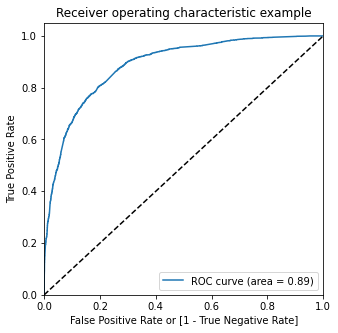

In [194]:
# ROC curve shows that this is a decent model
draw_roc(train.Actual, train["Predicted_Prob"])

#### Optimal cut off point for Probability

In [195]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train[i]= train["Predicted_Prob"].map(lambda x: 1 if x > i else 0)
train.head()

,Predicted_Prob,Actual,Predicted_Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.967957,1,1,1,1,1,1,1,1,1,1,1,1
1,0.023469,0,0,1,0,0,0,0,0,0,0,0,0
2,0.547245,1,1,1,1,1,1,1,1,0,0,0,0
3,0.349581,1,0,1,1,1,1,0,0,0,0,0,0
4,0.120414,0,0,1,1,0,0,0,0,0,0,0,0


In [196]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train.Actual, train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376132  1.000000  0.000000
0.1   0.1  0.593834  0.977609  0.362455
0.2   0.2  0.761958  0.915082  0.669638
0.3   0.3  0.788495  0.863963  0.742995
0.4   0.4  0.813761  0.759611  0.846409
0.5   0.5  0.815668  0.692860  0.889710
0.6   0.6  0.809312  0.623152  0.921549
0.7   0.7  0.781344  0.504014  0.948548
0.8   0.8  0.761004  0.415294  0.969435
0.9   0.9  0.716034  0.264047  0.988538


In [197]:
# We had considered a probability of 0.5, however we see that when we decrease the probability, the sensitivity increases.

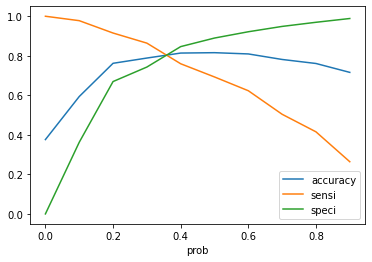

In [198]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### The optimal cut-off point is around 0.38

In [199]:
# taking 0.38 as the cutoff, let us make the final prediction

train['final_predicted'] = train.Predicted_Prob.map( lambda x: 1 if x > 0.38 else 0)

train.head()

,Predicted_Prob,Actual,Predicted_Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.967957,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0.023469,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.547245,1,1,1,1,1,1,1,1,0,0,0,0,1
3,0.349581,1,0,1,1,1,1,0,0,0,0,0,0,0
4,0.120414,0,0,1,1,0,0,0,0,0,0,0,0,0


#### Accuracy of the final prediction

In [200]:
metrics.accuracy_score(train.Actual, train.final_predicted)

0.8112188145558558

#### Confusion Matrix of the final prediction

In [201]:
confusion2 = metrics.confusion_matrix(train.Actual, train.final_predicted )
confusion2

array([[3276,  650],
       [ 538, 1829]])

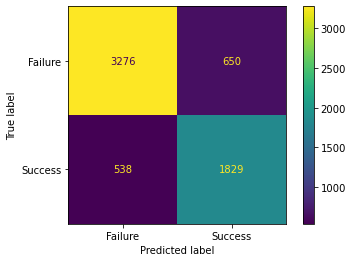

In [202]:

cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion2,display_labels=["Failure","Success"])
cm_display.plot()
plt.show()

In [203]:
# Creating variables for TP,TN,FP,FN
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [204]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7727080692860161

In [205]:
# Let us calculate specificity
TN / float(TN+FP)

0.8344370860927153

In [206]:
# Let us also check the precision and recall scores
from sklearn.metrics import precision_score, recall_score
precision_score(train.Actual, train.final_predicted)

0.7377974989915288

In [207]:
# Recall score is nothing but sensitivity
recall_score(train.Actual, train.final_predicted)

0.7727080692860161

#### Since in the model we need to focus more on getting the True Positive high and minimising the False Negative, we will go ahead with the sensitivity and specificity test for evualating the model

### 8. Making predictions on the test set

In [208]:
# We have already created the y_test_pred using model 7. Let us create a DataFrame of the test set with the cut off point of 0.38
test=pd.DataFrame()
test["Predicted_Prob"]=y_test_pred
test["Actual"]=y_test.values
test["Predicted_Class"]=np.where(test["Predicted_Prob"]>0.38,1,0)
test.head()

,Predicted_Prob,Actual,Predicted_Class
0,0.441430,0,1
1,0.960205,1,1
2,0.073157,1,0
3,0.689714,1,1
4,0.021739,0,0


#### Confusion Matrix of the test set

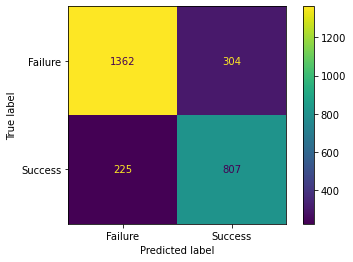

In [209]:
confusion_matrix=metrics.confusion_matrix(test["Actual"],test["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.show()

#### Accuracy of the test set

In [210]:
# The accuracy of the test set is close to training set, hence it is a good model
metrics.accuracy_score(test.Actual,test["Predicted_Class"])

0.8039288361749444

In [211]:
# Creating the variables True Positive(TP), True Negative(TN), False Postive(FP) amd False Negative(FN) 
# from the confusion matrix of the test DataFrame
TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

In [212]:
# Let us check the sensitivity on the test data. Both train and test data set have similar sensitivity values.
sensitivity_test=TP/(TP+FN)
sensitivity_test

0.7819767441860465

In [213]:
# Let us check specificity
specificity_test=TN/float(TN+FP)
specificity_test

0.8175270108043218

Overall this is a good model to predict whether the leads can be converted or not.

- The model has 14 predictor variables.

- The p-value of all the variables is less than 0.05

- The VIF of all variables is less than 5.

- The model has a good accuracy on the training and testing set of 81.12% and 80.39% respectively( This is at the optimal cut-off probability of 0.38) .

- The model has a sensitivity of 77.27% and 78.19% on training and testing data respectively.Lowering the probability threshold further can improve sensitivity but we will need to consider business views on the same.

For assigning a lead score ranging from 0 to 100 , the predicted probability for each lead can be used.

Lead Score="Predicted_Prob" *100